# Heat diffusion 

- toc:false
- branch: master
- badges: true
- comments: false
- categories: [mathematics, numerical recipes]
- hide: true

-----
Questions:
- How do I combine the finite difference method and Euler methods to solve the diffusion equation? 

Objectives:
- Apply the finite difference method and the Euler method to solve theat heat diffusion equation

-----

### The diffusion equation is an initial value problem

In the previous section we solved a boundary value problem in the form of Laplace's equation. In this section we will look at an initial value problem, which is a more complex type of PDE. An initial value problem is more complex as we are told the starting conditions and then have to predict future behaviour as a function of time.

The example we will use is the one-dimensional diffusion equation:

\begin{equation}
 \frac{\partial \phi}{\partial t} = D\frac{\partial^2 \phi}{\partial x^2}
\end{equation}

In this case we have a variable $\phi(x,t)$ that depends on position $x$ and time $t$ - so can we not solve it in the same way as finding the $\phi(x,y)$ Laplace's equation, which also had two independent variables?

The problem is that we  only have an *initial* condition in the time dimension - we know the value of $\phi(x,t)$ at $t=0$ but we do not typically know the value of $t$ at a later point. In the spatial dimensions we know the boundary conditions at either end of the grid.

Instead, we will use the <mark>Forward-Time Centred-Space method (FTCS)</mark>.

### There are two steps to the FTCS method

#### Step one
Use the finite difference method to express the Laplacian as a set of simulatenous equations:

where $a$ is the grid spacing.

Substitute this back into the diffusion equation:

#### Step two
We now have a set of simultaneous ODEs for $\phi(x,t)$. So we can use Euler's method to evolve the system forward in time. Euler's method has the general form:

\begin{equation}
\phi(t+h) \simeq \phi(t) + hf(\phi, t).
\end{equation}

Applying this to Equation X gives:





### The FTCS can be applied using the Python skills we have developed

Consider a 10cm rod of stainless steel initially at a uniform temperature of 20$\degrees$ Celsius. The rod is dipped in a hot water bath at 90$\degrees$ Celsius at one end, and held in someone's hand at the other. Assume that the hand is at constant body temperature throughout (27$\degrees$ Celsius).

The proble can be represented visually as follows:

Our goal is to calculate the temperature profile of the steel as a function of distance $x$ from the cold side to the hot side, and as a function of time. For simplicity let us assume that the rod is perfectly insulated so that heat only moves horizontally; as a result this problem can be modelled as 1-dimensional. Also assume that neighter the hot water bath or the hand change temperature appreciably.

Thermal conduction is described by the diffusion equation (or heat equation in this context)

\begin{equation}
 \frac{\partial \phi}{\partial t} = D\frac{\partial^2 \phi}{\partial x^2},
\end{equation}

where $D$ is the material dependent thermal diffusivity. For steel $D=4.25\times10^{-6}\mathrm{m}^2\mathrm{s}^{-1}$.

First, let's import the libraries we will be using

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now let's fix some of the constants in the problem

In [2]:
L = 0.01 # width of the rod in metres
D = 4.25e-6 # thermal diffusivity of  steel

And some of the numerical parameters:

In [3]:
N = 100 # number of divisions in the grid
a = L/N # grid spacing
h = 1e-4 # time step

Let's specify the boundary conditions and the initial condition

In [18]:
T_left = 0.0  # temperature fixed on left side of rod
T_right = 50.0 # temperature fixed on right side of rod
T_middle = 20.0 # temperature of rod at the beginning

And now create an array $T$ to hold the temperature of the rod and an array $T_{new}$ to calculate the temperature of the rod after evolving through time. Note that there are $N$ grid divisions but $N+1$ grid points (as we are evaluating at the boundary on each edge).

In [19]:
T = np.empty(N+1, float)  
T_new = np.empty(N+1, float)

Apply the boundary conditions and initial condition to our rod:

In [20]:
T[0] = T_left
T[-1] = T_right
T[1:-1] = T_middle
T_new[0] = T_left
T_new[-1] = T_right

In [21]:
def evolve(T,T_new):
    c = (h*D)/(a*a)
    T_new[1:N] = T[1:N] + c*(T[2:N+1]+T[0:N-1]-2*T[1:N])
    return T, T_new
    
    

0.9999999999999062


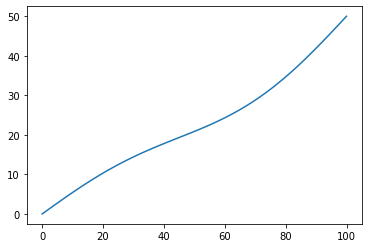

In [22]:
times=np.array([0.01,0.1,0.4,1,10])
t_end = times[-1]+epsilon
t=0.0
epsilon = h/1000

while t < t_end:
    
    T_new, T = evolve(T, T_new)
    t+=h
    
    if abs(t-times.any())<epsilon:
        print(t)
        plt.plot(T)

---
Keypoints:



---

Do [the quick-test](https://nu-cem.github.io/CompPhys/2021/08/02/Heat-Diffusion-Qs.html).

Back to [Modelling with Partial Differential Equations](https://nu-cem.github.io/CompPhys/2021/08/02/PDEs.html).

---